In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


A Decision Tree was used to classify the MMSE scores.As we did not hav a test Dataset of MMSE scores,we generated 100 random values and classified them. As the categories were very clearly defined,the performance metrics of the model are very high.

Test MMSE Scores:
[ 4 20 10 22 27 29 10 22 29 21 28  7  4 18 30 21 29 24 24  8 12  7 29  6
 12 13 30 12 24 22 24  5  5 26 18 24 10  9 13 29 14  8  4 18 30 21 13 25
 18  0 17 19 25 11  8 10 16 27 25  7 24 11  3 12 28 14  0 18 20  8 12 27
  1 21  6 10 30 12 26 26 16  5 12 17 18 11 15  1 19 25 25  7 13 24 30 25
 14 20  7  7 21 25 11 24 14 22 24 28 24  5 21  7 23  3 23 10 20  0  5 13
  2 29  1 22 17  9 26 27 21 27  6 25  8 20  4 27  3 25 18 24 29 24 13  9
  3 27 13 13 13  8  7  3 23 14 14  7  2 18 14  0 14  1 21  2 16 15  4  7
 11  3 25 25 17 23  3  2 10 22 26 27  7  4 27  0  4 11  4  6 15 12 14 30
  1  3 28 25 29  6  4 14 28  5  9  3 24 16 14 12  5 24  9 28 28  2  0  8
 19 17  8  3 26  6 14 25 27  4 28 29  2 17 23 17  8  8 27  4  8 21 30 11
 30 10 24  6  5  0  0 13 26  9 24 21 24 12  6 12 16 25 19 19  6 28 12 22
 25 23  8 12 18  0 13  4 22 19  8 11  7 17 30 25 15 27 29 28 20  3 10 17
 25 30 12 11  7 30 13 16  1  0 12 10  3  0  1 19  4  6 24  9  2 11 13 10
 30 19 14 15 10 28 10 20  1 24  2

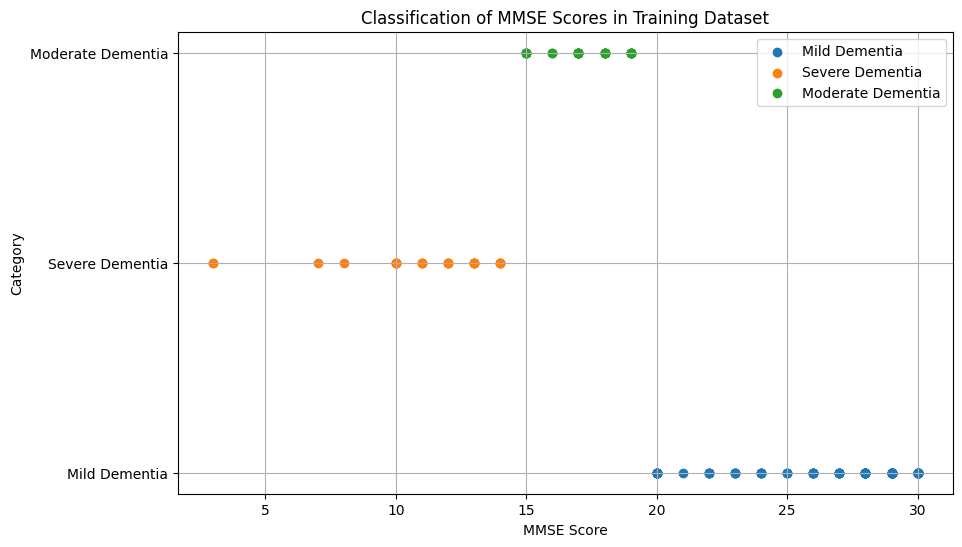

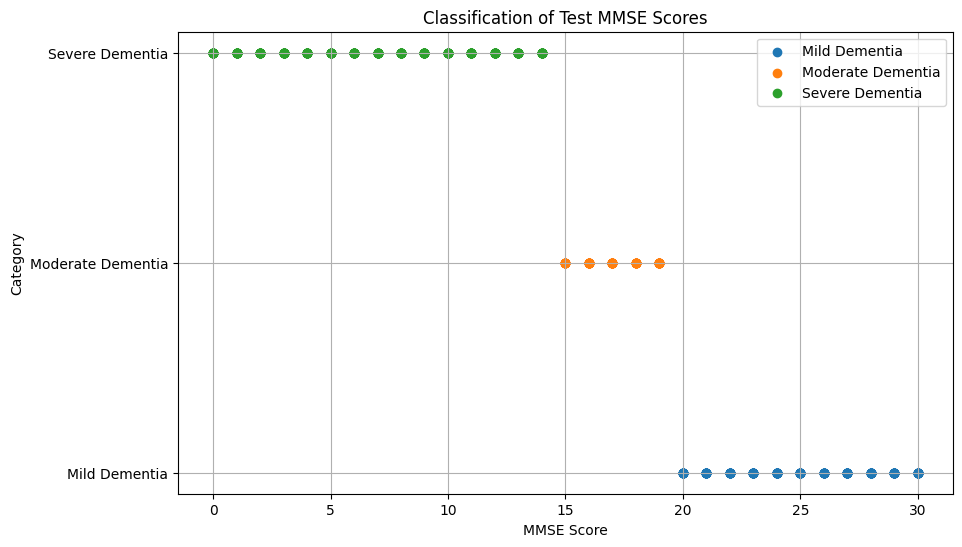

Test MMSE Scores:
MMSE Score: 4, Category: Severe Dementia
MMSE Score: 20, Category: Mild Dementia
MMSE Score: 10, Category: Severe Dementia
MMSE Score: 22, Category: Mild Dementia
MMSE Score: 27, Category: Mild Dementia
MMSE Score: 29, Category: Mild Dementia
MMSE Score: 10, Category: Severe Dementia
MMSE Score: 22, Category: Mild Dementia
MMSE Score: 29, Category: Mild Dementia
MMSE Score: 21, Category: Mild Dementia
MMSE Score: 28, Category: Mild Dementia
MMSE Score: 7, Category: Severe Dementia
MMSE Score: 4, Category: Severe Dementia
MMSE Score: 18, Category: Moderate Dementia
MMSE Score: 30, Category: Mild Dementia
MMSE Score: 21, Category: Mild Dementia
MMSE Score: 29, Category: Mild Dementia
MMSE Score: 24, Category: Mild Dementia
MMSE Score: 24, Category: Mild Dementia
MMSE Score: 8, Category: Severe Dementia
MMSE Score: 12, Category: Severe Dementia
MMSE Score: 7, Category: Severe Dementia
MMSE Score: 29, Category: Mild Dementia
MMSE Score: 6, Category: Severe Dementia
MMSE S

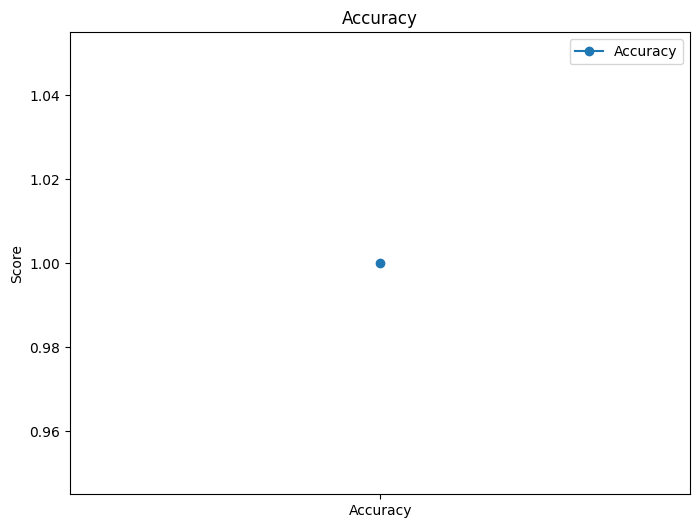

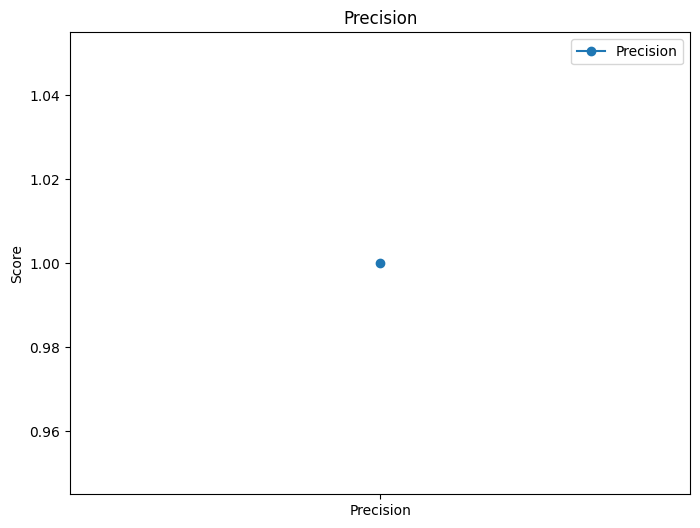

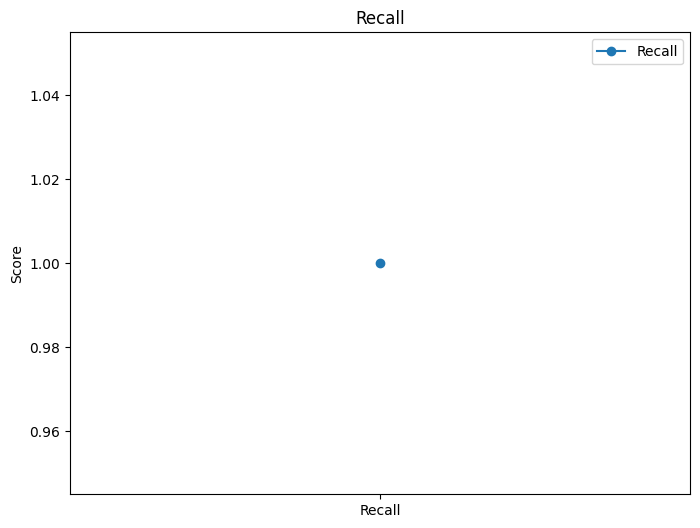

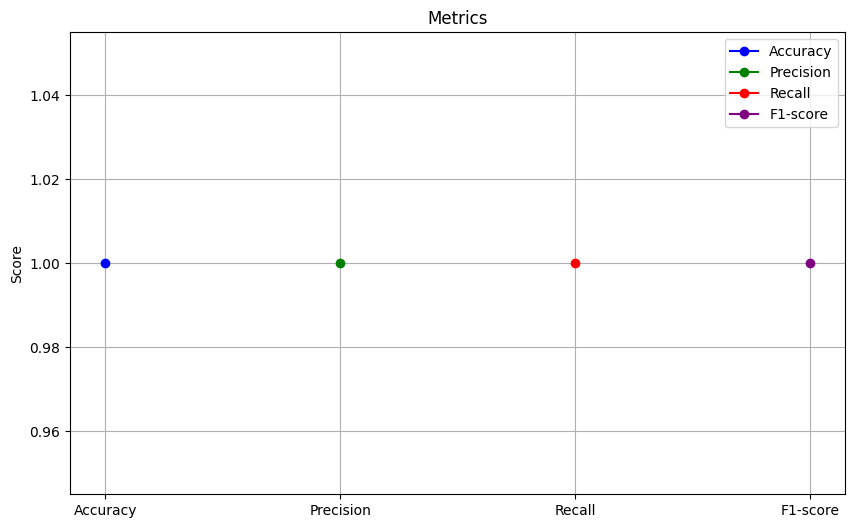

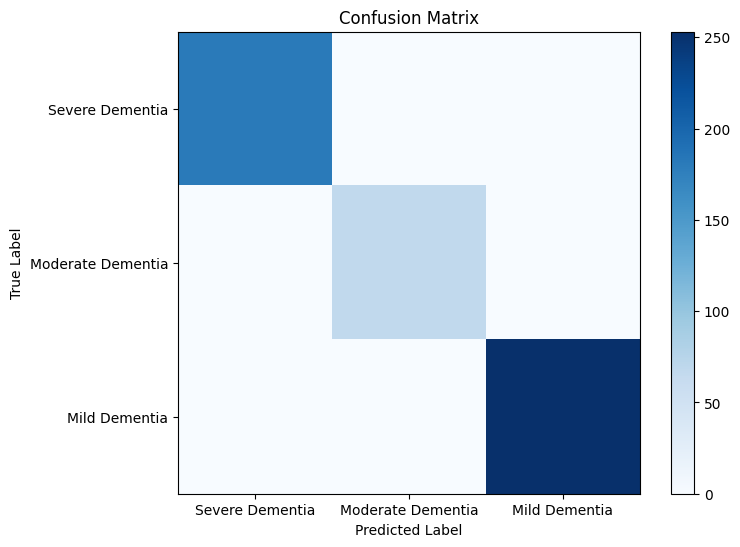

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd

train_data = pd.read_csv("/content/drive/MyDrive/Dementia Dataset/ADReSSo21-diagnosis-train/ADReSSo21/diagnosis/train/adresso-train-mmse-scores.csv")
def classify_mmse(mmse_score):
    if mmse_score >= 20:
        return 'Mild Dementia'
    elif 15 <= mmse_score <= 19:
        return 'Moderate Dementia'
    else:
        return 'Severe Dementia'


train_data['category'] = train_data['mmse'].apply(classify_mmse)

clf = DecisionTreeClassifier()
clf.fit(train_data['mmse'].values.reshape(-1, 1), train_data['category'])


test_mmse_scores = np.random.randint(0, 31, size=500)

print("Test MMSE Scores:")
print(test_mmse_scores)
y_pred = clf.predict(np.array(test_mmse_scores).reshape(-1, 1))


plt.figure(figsize=(10, 6))
for category in train_data['category'].unique():
    plt.scatter(train_data[train_data['category'] == category]['mmse'],
                train_data[train_data['category'] == category]['category'],
                label=category)
plt.xlabel('MMSE Score')
plt.ylabel('Category')
plt.title('Classification of MMSE Scores in Training Dataset')
plt.yticks(['Severe Dementia', 'Moderate Dementia', 'Mild Dementia'])
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
for category in np.unique(y_pred):
    plt.scatter(np.array(test_mmse_scores)[y_pred == category],
                [category] * sum(y_pred == category),
                label=category)
plt.xlabel('MMSE Score')
plt.ylabel('Category')
plt.title('Classification of Test MMSE Scores')
plt.yticks(['Severe Dementia', 'Moderate Dementia', 'Mild Dementia'])
plt.grid(True)
plt.legend()
plt.show()

print("Test MMSE Scores:")
for score, category in zip(test_mmse_scores, y_pred):
    print(f"MMSE Score: {score}, Category: {category}")


true_categories = np.array([classify_mmse(score) for score in test_mmse_scores])


accuracy = accuracy_score(true_categories, y_pred)
print("Accuracy:", accuracy)


report = classification_report(true_categories, y_pred, target_names=['Severe Dementia', 'Moderate Dementia', 'Mild Dementia'], output_dict=True)
print("Classification Report:")
print(report)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

plt.figure(figsize=(8, 6))
plt.plot(['Accuracy'], [accuracy], marker='o', label='Accuracy')
plt.title('Accuracy')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(['Precision'], [precision], marker='o', label='Precision')
plt.title('Precision')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(['Recall'], [recall], marker='o', label='Recall')
plt.title('Recall')
plt.ylabel('Score')
plt.legend()
plt.show()
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

plt.figure(figsize=(10, 6))
plt.plot(['Accuracy'], [accuracy], marker='o', label='Accuracy', color='blue')
plt.plot(['Precision'], [precision], marker='o', label='Precision', color='green')
plt.plot(['Recall'], [recall], marker='o', label='Recall', color='red')
plt.plot(['F1-score'], [f1_score], marker='o', label='F1-score', color='purple')
plt.title('Metrics')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

cm = confusion_matrix(true_categories, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['Severe Dementia', 'Moderate Dementia', 'Mild Dementia']))
plt.xticks(tick_marks, ['Severe Dementia', 'Moderate Dementia', 'Mild Dementia'])
plt.yticks(tick_marks, ['Severe Dementia', 'Moderate Dementia', 'Mild Dementia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
